# Творчерская работа по ТКГ
## Выполнил Старостин Виктор Романович
### С/Б: 1032190610
### Группа: НФИбд-03-19

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


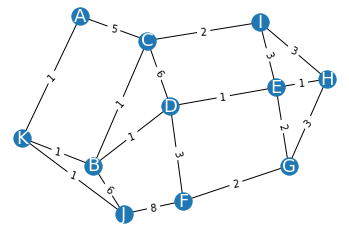

In [2]:
G = nx.Graph()

# Задаем вершины
G.add_nodes_from([(chr(idn), {'label':chr(idn)}) for idn in range(65,76)])

# for node in G.nodes():
#     print(f'Node {node} has label {G.nodes()[node]}')

# Задаем ребра
G.add_weighted_edges_from([
    ('A', 'K', 3), 
    ('A', 'C', 7),

    ('B', 'K', 7),
    ('B', 'J', 5),
    ('B', 'D', 2),
    ('B', 'C', 1),

    ('C', 'A', 5),
    ('C', 'B', 1),
    ('C', 'D', 3),
    ('C', 'I', 2),

    ('D', 'B', 1),
    ('D', 'C', 6),
    ('D', 'F', 7),
    ('D', 'E', 5),

    ('E', 'D', 1),
    ('E', 'I', 2),
    ('E', 'H', 2),
    ('E', 'G', 1),

    ('F', 'J', 3),
    ('F', 'D', 3),
    ('F', 'G', 3),

    ('G', 'F', 2),
    ('G', 'E', 2),
    ('G', 'H', 2),

    ('H', 'E', 1),
    ('H', 'I', 2),
    ('H', 'G', 3),

    ('I', 'C', 2),
    ('I', 'E', 3),
    ('I', 'H', 3),

    ('J', 'K', 5),
    ('J', 'B', 6),
    ('J', 'F', 8),

    ('K', 'A', 1),
    ('K', 'B', 1),
    ('K', 'J', 1)

])

# Отрисовка начального графа
pos = nx.spring_layout(G)
nx.draw_networkx_labels(G, pos, font_size=18, font_family="sans-serif",font_color='white')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

nx.draw(G,pos=pos)
plt.show()

In [3]:
# for endge in G.edges(data=True):
#     print(endge)

# Сортируем по убыванию массив с ребро.
max_sort_edges=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
max_sort_edges = list(reversed(max_sort_edges))
# print('Sort')
# for edge in max_sort_edges:
#     print(edge)

# Алгоритм Краскала

In [6]:
def FindParent(parent, node) :
    if parent[node] == node :
        return node
    return FindParent(parent,parent[node])

res = []
path_cost = 0
parent = {node:node for node in G.nodes()}
rank   = {node:0 for node in G.nodes()}
for edge in max_sort_edges:
    root1 = FindParent(parent,edge[0])
    root2 = FindParent(parent,edge[1])

    # Проверка на цикл и добавление в результирующий массив
    if root1 != root2 :
        res.append(edge[0:2])
        path_cost += edge[2]['weight']
        if rank[root1] < rank[root2] :
            parent[root1] = root2
            rank[root2] += 1
        else:
            parent[root2] = root1
            rank[root1] += 1

display(Markdown(f'# Максимальное остовное дерево:'))
display(Markdown(f'### {res}'))
display(Markdown(f'# Wt = {path_cost}'))

# Максимальное остовное дерево:

### [('F', 'J'), ('C', 'D'), ('B', 'J'), ('A', 'C'), ('H', 'I'), ('G', 'H'), ('E', 'I'), ('D', 'F'), ('F', 'G'), ('J', 'K')]

# Wt = 40

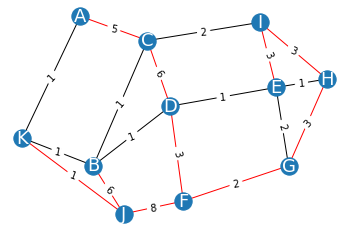

In [7]:
# Отрисовка финального графа
edges = G.edges()
for edge in edges:
    edges[edge]['color'] = 'red' if edge in res else 'black'
colors = [G[u][v]['color'] for u,v in edges]
nx.draw_networkx_labels(G, pos, font_size=18, font_family="sans-serif",font_color='white')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G, pos, edge_color=colors)